# Lab 2

Dmytro Geleshko

IP-91

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Config

In [2]:
pd.options.display.float_format ="{:,.2f}".format

# Water Data
## Load

In [3]:
df = pd.read_csv("../Data/water_potability.csv", dtype=np.float32)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,"20,791.32",7.30,368.52,564.31,10.38,86.99,2.96,0.00
1,3.72,129.42,"18,630.06",6.64,NaN,592.89,15.18,56.33,4.50,0.00
2,8.10,224.24,"19,909.54",9.28,NaN,418.61,16.87,66.42,3.06,0.00
3,8.32,214.37,"22,018.42",8.06,356.89,363.27,18.44,100.34,4.63,0.00
4,9.09,181.10,"17,978.99",6.55,310.14,398.41,11.56,32.00,4.08,0.00
...,...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,"47,580.99",7.17,359.95,526.42,13.89,66.69,4.44,1.00
3272,7.81,193.55,"17,329.80",8.06,NaN,392.45,19.90,NaN,2.80,1.00
3273,9.42,175.76,"33,155.58",7.35,NaN,432.04,11.04,69.85,3.30,1.00
3274,5.13,230.60,"11,983.87",6.30,NaN,402.88,11.17,77.49,4.71,1.00


## Get one column as a Series

In [4]:
col = df["Hardness"].dropna()
col

0      204.89
1      129.42
2      224.24
3      214.37
4      181.10
        ...  
3271   193.68
3272   193.55
3273   175.76
3274   230.60
3275   195.10
Name: Hardness, Length: 3276, dtype: float32

## Series Operations

In [5]:
col[0]

204.89046

In [6]:
col[1: 3]

1   129.42
2   224.24
Name: Hardness, dtype: float32

In [7]:
col.min(), col.mean(), col.max()

(47.432, 196.3695, 323.124)

In [8]:
col.describe()

count   3,276.00
mean      196.37
std        32.88
min        47.43
25%       176.85
50%       196.97
75%       216.67
max       323.12
Name: Hardness, dtype: float64

In [9]:
col.index = ["index_" + str(x + 1) for x in range(len(col))]
col

index_1      204.89
index_2      129.42
index_3      224.24
index_4      214.37
index_5      181.10
              ...  
index_3272   193.68
index_3273   193.55
index_3274   175.76
index_3275   230.60
index_3276   195.10
Name: Hardness, Length: 3276, dtype: float32

In [10]:
col.loc["index_3": "index_5"]

index_3   224.24
index_4   214.37
index_5   181.10
Name: Hardness, dtype: float32

In [11]:
col.iloc[3: 5]

index_4   214.37
index_5   181.10
Name: Hardness, dtype: float32

In [12]:
col = col.map(lambda x: "data-" + str(x)[:5])
col

index_1       data-204.8
index_2       data-129.4
index_3       data-224.2
index_4       data-214.3
index_5       data-181.1
                 ...    
index_3272    data-193.6
index_3273    data-193.5
index_3274    data-175.7
index_3275    data-230.6
index_3276    data-195.1
Name: Hardness, Length: 3276, dtype: object

## DataFrame Operations

In [13]:
df[["Hardness", "Solids"]]

,Hardness,Solids
0,204.89,"20,791.32"
1,129.42,"18,630.06"
2,224.24,"19,909.54"
3,214.37,"22,018.42"
4,181.10,"17,978.99"
...,...,...
3271,193.68,"47,580.99"
3272,193.55,"17,329.80"
3273,175.76,"33,155.58"
3274,230.60,"11,983.87"


In [14]:
df.iloc[0: 8, 0: 5]

,ph,Hardness,Solids,Chloramines,Sulfate
0,NaN,204.89,"20,791.32",7.30,368.52
1,3.72,129.42,"18,630.06",6.64,NaN
2,8.10,224.24,"19,909.54",9.28,NaN
3,8.32,214.37,"22,018.42",8.06,356.89
4,9.09,181.10,"17,978.99",6.55,310.14
5,5.58,188.31,"28,748.69",7.54,326.68
6,10.22,248.07,"28,749.72",7.51,393.66
7,8.64,203.36,"13,672.09",4.56,303.31


In [15]:
df.loc[0: 8, ["ph", "Solids"]]

,ph,Solids
0,NaN,"20,791.32"
1,3.72,"18,630.06"
2,8.10,"19,909.54"
3,8.32,"22,018.42"
4,9.09,"17,978.99"
5,5.58,"28,748.69"
6,10.22,"28,749.72"
7,8.64,"13,672.09"
8,NaN,"14,285.58"


In [16]:
df[df["Solids"] < 20000]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.72,129.42,"18,630.06",6.64,NaN,592.89,15.18,56.33,4.50,0.00
2,8.10,224.24,"19,909.54",9.28,NaN,418.61,16.87,66.42,3.06,0.00
4,9.09,181.10,"17,978.99",6.55,310.14,398.41,11.56,32.00,4.08,0.00
7,8.64,203.36,"13,672.09",4.56,303.31,474.61,12.36,62.80,4.40,0.00
8,NaN,118.99,"14,285.58",7.80,268.65,389.38,12.71,53.93,3.60,0.00
...,...,...,...,...,...,...,...,...,...,...
3267,8.99,215.05,"15,921.41",6.30,312.93,390.41,9.90,55.07,4.61,1.00
3268,6.70,207.32,"17,246.92",7.71,304.51,329.27,16.22,28.88,3.44,1.00
3272,7.81,193.55,"17,329.80",8.06,NaN,392.45,19.90,NaN,2.80,1.00
3274,5.13,230.60,"11,983.87",6.30,NaN,402.88,11.17,77.49,4.71,1.00


In [17]:
df[(df["Solids"] > 15000) & (df["Solids"] < 19000)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,3.72,129.42,"18,630.06",6.64,NaN,592.89,15.18,56.33,4.50,0.00
4,9.09,181.10,"17,978.99",6.55,310.14,398.41,11.56,32.00,4.08,0.00
11,7.97,218.69,"18,767.66",8.11,NaN,364.10,14.53,76.49,4.01,0.00
12,7.12,156.70,"18,730.81",3.61,282.34,347.72,15.93,79.50,3.45,0.00
22,NaN,215.98,"17,107.22",5.61,326.94,436.26,14.19,59.86,5.46,0.00
...,...,...,...,...,...,...,...,...,...,...
3259,9.27,181.26,"16,540.98",7.02,309.24,487.69,13.23,NaN,4.33,1.00
3267,8.99,215.05,"15,921.41",6.30,312.93,390.41,9.90,55.07,4.61,1.00
3268,6.70,207.32,"17,246.92",7.71,304.51,329.27,16.22,28.88,3.44,1.00
3272,7.81,193.55,"17,329.80",8.06,NaN,392.45,19.90,NaN,2.80,1.00


In [18]:
df.iat[1, 0]

3.7160802

In [19]:
df.at[1, "ph"]

3.7160802

In [20]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,"2,785.00","3,276.00","3,276.00","3,276.00","2,495.00","3,276.00","3,276.00","3,114.00","3,276.00","3,276.00"
mean,7.08,196.37,"22,014.09",7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,"8,768.57",1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,"15,666.69",6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,"20,927.83",7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,"27,332.76",8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,"61,227.20",13.13,481.03,753.34,28.30,124.00,6.74,1.00


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,"2,785.00",7.08,1.59,0.00,6.09,7.04,8.06,14.00
Hardness,"3,276.00",196.37,32.88,47.43,176.85,196.97,216.67,323.12
Solids,"3,276.00","22,014.09","8,768.57",320.94,"15,666.69","20,927.83","27,332.76","61,227.20"
Chloramines,"3,276.00",7.12,1.58,0.35,6.13,7.13,8.11,13.13
Sulfate,"2,495.00",333.78,41.42,129.00,307.70,333.07,359.95,481.03
Conductivity,"3,276.00",426.21,80.82,181.48,365.73,421.88,481.79,753.34
Organic_carbon,"3,276.00",14.28,3.31,2.20,12.07,14.22,16.56,28.30
Trihalomethanes,"3,114.00",66.40,16.18,0.74,55.84,66.62,77.34,124.00
Turbidity,"3,276.00",3.97,0.78,1.45,3.44,3.96,4.50,6.74
Potability,"3,276.00",0.39,0.49,0.00,0.00,0.00,1.00,1.00


In [22]:
df.sort_index(ascending=False)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3275,7.87,195.10,"17,404.18",7.51,NaN,327.46,16.14,78.70,2.31,1.00
3274,5.13,230.60,"11,983.87",6.30,NaN,402.88,11.17,77.49,4.71,1.00
3273,9.42,175.76,"33,155.58",7.35,NaN,432.04,11.04,69.85,3.30,1.00
3272,7.81,193.55,"17,329.80",8.06,NaN,392.45,19.90,NaN,2.80,1.00
3271,4.67,193.68,"47,580.99",7.17,359.95,526.42,13.89,66.69,4.44,1.00
...,...,...,...,...,...,...,...,...,...,...
4,9.09,181.10,"17,978.99",6.55,310.14,398.41,11.56,32.00,4.08,0.00
3,8.32,214.37,"22,018.42",8.06,356.89,363.27,18.44,100.34,4.63,0.00
2,8.10,224.24,"19,909.54",9.28,NaN,418.61,16.87,66.42,3.06,0.00
1,3.72,129.42,"18,630.06",6.64,NaN,592.89,15.18,56.33,4.50,0.00


In [23]:
df.sort_values("ph", inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3014,0.00,214.85,"49,456.59",7.90,NaN,583.45,7.70,77.71,4.93,0.00
726,0.23,152.53,"39,028.60",3.46,283.69,443.03,13.20,62.32,3.55,1.00
2928,0.98,221.20,"31,145.11",7.62,333.68,439.11,21.15,NaN,2.53,0.00
810,0.99,133.22,"16,922.85",9.29,444.38,322.29,10.43,43.58,5.16,1.00
2899,1.43,228.13,"12,937.25",6.21,319.73,495.38,12.03,61.14,4.95,0.00
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.22,"31,081.73",7.42,NaN,517.93,11.71,85.43,3.35,1.00
3229,NaN,203.20,"10,643.19",6.83,NaN,384.60,16.01,72.91,3.07,1.00
3231,NaN,225.75,"28,194.45",5.89,366.20,418.27,17.31,103.91,3.86,1.00
3245,NaN,188.54,"24,711.41",7.13,NaN,555.55,16.96,56.04,4.33,1.00


# Titanic Data
## Load
Loading data from URL as DataFrame using pandas

In [24]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv")
df.rename(columns={
    "Unnamed: 0": "name",
    "passengerClass": "class"
    }, inplace=True)

df.head(10)

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


In [25]:
df.tail(10)

,name,survived,sex,age,class
1299,"Yasbeck, Mr. Antoni",no,male,27.00,3rd
1300,"Yasbeck, Mrs. Antoni (Selini Al",yes,female,15.00,3rd
1301,"Youseff, Mr. Gerious",no,male,45.50,3rd
1302,"Yousif, Mr. Wazli",no,male,NaN,3rd
1303,"Yousseff, Mr. Gerious",no,male,NaN,3rd
1304,"Zabour, Miss. Hileni",no,female,14.50,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.50,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.00,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.00,3rd


## Info
Get some info about data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1309 non-null   object 
 1   survived  1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   class     1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


## Transform and Cast

In [27]:
# str to int
temp = df.pop("sex")
df["isMale"] = (temp == "male").astype(np.int32)

# str to int
df["survived"] = (df["survived"] == "yes").astype(np.int32)

# str to int
df["class"] = df["class"].apply(lambda x: x[0]).astype(np.int32)

# float64 to float32
df["age"] = df["age"].astype(np.float32)

df

,name,survived,age,class,isMale
0,"Allen, Miss. Elisabeth Walton",1,29.00,1,0
1,"Allison, Master. Hudson Trevor",1,0.92,1,1
2,"Allison, Miss. Helen Loraine",0,2.00,1,0
3,"Allison, Mr. Hudson Joshua Crei",0,30.00,1,1
4,"Allison, Mrs. Hudson J C (Bessi",0,25.00,1,0
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",0,14.50,3,0
1305,"Zabour, Miss. Thamine",0,NaN,3,0
1306,"Zakarian, Mr. Mapriededer",0,26.50,3,1
1307,"Zakarian, Mr. Ortin",0,27.00,3,1


## Stats
Get stats about our data

In [28]:
df.describe()

,survived,age,class,isMale
count,"1,309.00","1,046.00","1,309.00","1,309.00"
mean,0.38,29.88,2.29,0.64
std,0.49,14.41,0.84,0.48
min,0.00,0.17,1.00,0.00
25%,0.00,21.00,2.00,0.00
50%,0.00,28.00,3.00,1.00
75%,1.00,39.00,3.00,1.00
max,1.00,80.00,3.00,1.00


## Simple analysis

In [29]:
df.sort_values("age").iloc[0]

name        Dean, Miss. Elizabeth Gladys M
survived                                 1
age                                   0.17
class                                    3
isMale                                   0
Name: 763, dtype: object

In [30]:
df.dropna().sort_values("age").iloc[-1]

name        Barkworth, Mr. Algernon Henry W
survived                                  1
age                                   80.00
class                                     1
isMale                                    1
Name: 14, dtype: object

In [31]:
df_female_1st = df[(df["isMale"] == False) & (df["class"] == 1)]
df_female_1st

,name,survived,age,class,isMale
0,"Allen, Miss. Elisabeth Walton",1,29.00,1,0
2,"Allison, Miss. Helen Loraine",0,2.00,1,0
4,"Allison, Mrs. Hudson J C (Bessi",0,25.00,1,0
6,"Andrews, Miss. Kornelia Theodos",1,63.00,1,0
8,"Appleton, Mrs. Edward Dale (Cha",1,53.00,1,0
...,...,...,...,...,...
311,"Wick, Mrs. George Dennick (Mary",1,45.00,1,0
314,"Widener, Mrs. George Dunton (El",1,50.00,1,0
315,"Willard, Miss. Constance",1,21.00,1,0
319,"Wilson, Miss. Helen Alice",1,31.00,1,0


In [32]:
df_female_1st.sort_values("age").iloc[0]

name        Allison, Miss. Helen Loraine
survived                               0
age                                 2.00
class                                  1
isMale                                 0
Name: 2, dtype: object

In [33]:
df_female_1st.dropna().sort_values("age").iloc[-1]

name        Cavendish, Mrs. Tyrell William
survived                                 1
age                                  76.00
class                                    1
isMale                                   0
Name: 61, dtype: object

In [34]:
df_female_1st["survived"].sum()

139

## Plots

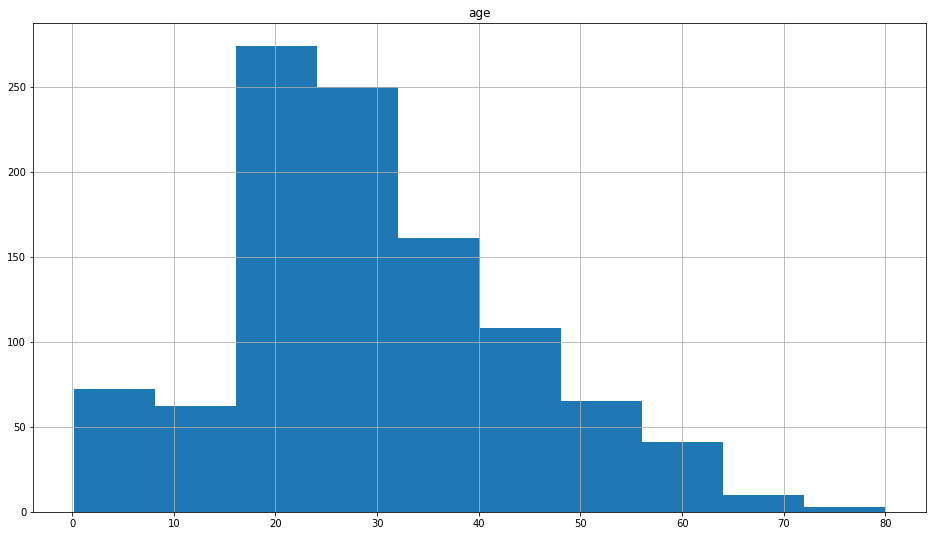

In [35]:
plt.rcParams["figure.figsize"] = (16, 9)
df.hist(column="age")
plt.show()

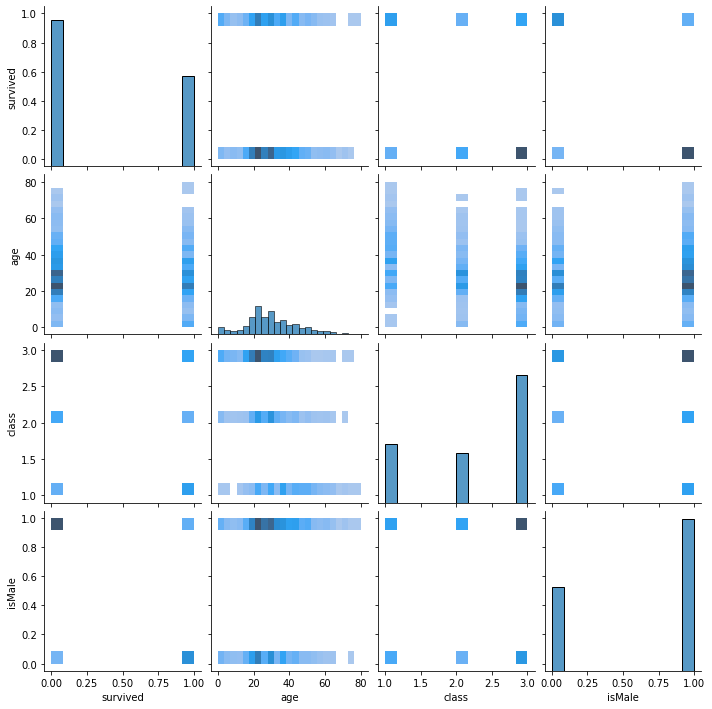

In [36]:
plt.rcParams["figure.figsize"] = (16, 16)
sns.pairplot(data=df, kind="hist")
plt.show()

# The End